# Credit Risk Modeling Using SVM

This project analyzes the default of credit card clients using Support Vector Machines (SVM). 

We use a dataset from a research paper published in *Expert Systems with Applications* by I. Yeh and Che-hui Lien (2009), which focuses on the case of customer default payments in Taiwan.

---

### 📌 Objective
To build a classification model using Support Vector Machine (SVM) to predict whether a customer will default on their credit card payment.

---

### 📂 Dataset Information

- **File**: `default of credit card clients.xls`
- **Instances**: 30,000
- **Features**: 23
- **Target Variable**: `default.payment.next.month` (1 = default, 0 = not default)
- **Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)
- **Has missing values?** No

In [44]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Load the dataset (ensure the file is in your working directory)
file_path = "default of credit card clients.xls"
df = pd.read_excel(file_path, header=1)

print("First 5 Rows:")
display(df.head())

print("\n Missing Values (Column-wise):")
print(df.isnull().sum())

print("\n Dataset Shape (rows, columns):", df.shape)

print("\n Data Types:")
print(df.dtypes)

First 5 Rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0



 Missing Values (Column-wise):
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

 Dataset Shape (rows, columns): (30000, 25)

 Data Types:
ID                            int64
LIMIT_BAL                     int64
SEX                     

**NOTE**: The last colum name, **default payment month**, is long. Let's change it to default

In [12]:
df.rename({'default payment next month': 'DEFAULT'}, axis = 'columns', inplace= True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Also, the values in the **ID** column is not necessary so let's drop it

In [14]:
df.drop('ID', axis = 1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Variable Description and Preprocessing Notes

The dataset includes 23 explanatory variables and 1 target variable (`default.payment.next.month`), where:

- **Target**: `default.payment.next.month` — 1 if the client defaulted, 0 otherwise.

### 🔸 Variable Breakdown:

- `X1`: Amount of given credit (includes individual and family credit)
- `X2`: Gender (1 = male, 2 = female)
- `X3`: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- `X4`: Marital status (1 = married; 2 = single; 3 = others)
- `X5`: Age (in years)

- `X6 – X11`: Repayment status from April to September 2005  
    - -1 = pay duly  
    - 1, 2, ..., 9 = months delayed

- `X12 – X17`: Monthly bill statement amounts (April–Sept)
- `X18 – X23`: Monthly previous payment amounts (April–Sept)

---

### ⚠️ Handling Invalid Categorical Values

After inspecting the dataset, we note:

- `EDUCATION` contains 0, 5, 6 which are not valid according to the defined categories (should be 1–4)
- `MARRIAGE` contains 0 which is also invalid (should be 1–3)

We will **drop rows** containing such invalid values to ensure clean input for our SVM model.


In [18]:
df['SEX'].unique()

array([2, 1])

In [19]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [20]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

## Locate and Count Invalid Categorical Values

The dataset documentation specifies that:

- `EDUCATION` should be one of:  
  **1 = graduate school, 2 = university, 3 = high school, 4 = others**

- `MARRIAGE` should be one of:  
  **1 = married, 2 = single, 3 = others**

However, some rows contain:
- Invalid `EDUCATION` values like **0, 5, or 6**
- Invalid `MARRIAGE` value like **0**

Let’s identify and count those rows using `.loc[]` and `len()`.


In [26]:
invalid_edu = df.loc[df['EDUCATION'] == 0]
print("Number of rows with invalid EDUCATION values (0):", len(invalid_edu))

invalid_marriage = df.loc[df['MARRIAGE'] == 0]
print("Number of rows with invalid MARRIAGE value (0):", len(invalid_marriage))

invalid_combined = df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)]
print("Total unique rows with invalid values:", len(invalid_combined))

Number of rows with invalid EDUCATION values (0): 14
Number of rows with invalid MARRIAGE value (0): 54
Total unique rows with invalid values: 68


In [30]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df_no_missing)

29932

## Downsample the Dataset for SVM

After removing invalid rows, we are left with 29,932 samples — which is still a large dataset for SVM training, especially on limited resources.

Also, imbalanced data (many more 0s than 1s) can bias the model.

To address both concerns, we'll:

1. **Downsample the majority class (label = 0)**.
2. **Take an equal number of samples from the minority class (label = 1)**.

This creates a **balanced dataset** suitable for SVM training.

In [32]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

n_samples = 1000  # Choose a limit for both classes (e.g., 1000)

df_no_default_down = df_no_default.sample(n=n_samples, random_state=42)
df_default_down = df_default.sample(n=n_samples, random_state=42)

# Combine and shuffle
balanced_df = pd.concat([df_no_default_down, df_default_down]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new shape and class distribution
print("Balanced downsampling complete.")
print("Shape:", balanced_df.shape)
print("Class distribution:\n", balanced_df['DEFAULT'].value_counts())


Balanced downsampling complete.
Shape: (2000, 24)
Class distribution:
 DEFAULT
1    1000
0    1000
Name: count, dtype: int64


## Format the Data and Create Train-Test Split

To prepare the dataset for SVM modeling, we will:

- Drop the `ID` column (non-informative identifier)
- Separate the features (`X`) and the target label (`y`)
- Standardize the features using `StandardScaler` (important for SVM performance)
- Split the data into 80% training and 20% testing using `train_test_split`


In [33]:
X = balanced_df.drop(columns=['DEFAULT'])
y = balanced_df['DEFAULT']

## Step 10: One-Hot Encode Categorical Variables

Several features in our dataset are categorical but represented as integers:

- `SEX`: Gender (1 = male, 2 = female)
- `EDUCATION`: Levels of education (1–4)
- `MARRIAGE`: Marital status (1–3)
- `PAY_0` to `PAY_6`: Past repayment statuses (ordinal, but treated as categorical for modeling)

To avoid misleading the model with numeric ordering, we will apply **One-Hot Encoding** to these columns before scaling and training.

> ℹ️ Note: One-hot encoding creates binary columns for each unique category, avoiding incorrect assumptions about order.


In [39]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X_encoded = pd.get_dummies(X, columns = categorical_cols)
print(X_encoded.shape)
X_encoded.head()

(2000, 81)


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
0,30000,47,778,5898,8610,8402,10878,10790,5900,3000,299,3000,608,274,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,130000,29,58299,59352,51420,48140,34893,33986,2626,8585,1620,698,725,843,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,30000,33,30384,30134,30646,29657,30232,28415,3010,3000,3000,3000,1083,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,160000,38,6000,6000,6228,6000,6000,6000,6000,6228,6000,6000,6000,6000,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,210000,41,390,1732,1170,780,390,69438,1732,0,0,0,69438,3750,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


## Train-Test Split and Feature Scaling

To properly prepare for SVM training:

- We first split the one-hot encoded data into training and test sets (80/20, stratified).
- Then we scale the features using `StandardScaler`, **fitting only on the training set** to avoid data leakage.


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Fit scaler on training data only, then transform both
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the SVM Model

With the training data scaled and preprocessed, we now fit a **Support Vector Machine (SVM)** classifier.

We'll use the `SVC` class from `scikit-learn` with default parameters (`rbf` kernel) and evaluate its performance on the test set.


In [41]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

## Evaluate the SVM Model

To assess the performance of our SVM model, we’ll use:

- **Accuracy**: Overall correct predictions
- **Classification Report**: Precision, recall, F1-score per class
- **Confusion Matrix**: Summary of correct vs. incorrect predictions
- **Heatmap**: Visualize the confusion matrix for easy interpretation

Accuracy: 0.6675

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       200
           1       0.71      0.56      0.63       200

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.66       400
weighted avg       0.67      0.67      0.66       400



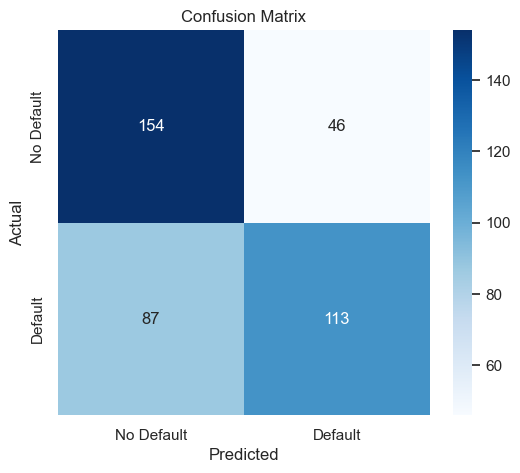

In [43]:
# Predict on test set
y_pred = svm_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

  ## Step 14: Optimize SVM Hyperparameters Using Grid Search and Cross-Validation

Support Vector Machines have several key hyperparameters:

- `C`: Regularization strength
- `gamma`: Kernel coefficient for 'rbf'
- `kernel`: Type of kernel (linear, rbf, poly, etc.)

We'll use `GridSearchCV` with 5-fold cross-validation to search for the best combination of `C` and `gamma` using the **RBF kernel**.


In [48]:
# Define parameter grid
param_grid = {
    'C': [0.5, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Grid search complete.")
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Grid search complete.
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [50]:
new_svm_model = SVC(C= 100, gamma = 0.001)
new_svm_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001)

Accuracy: 0.6600

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       200
           1       0.70      0.56      0.62       200

    accuracy                           0.66       400
   macro avg       0.67      0.66      0.66       400
weighted avg       0.67      0.66      0.66       400



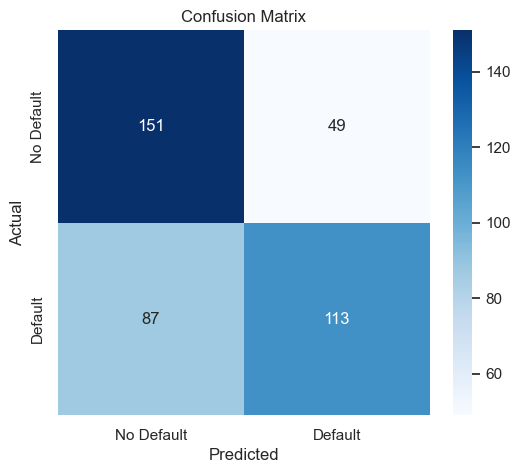

In [52]:
# Predict on test set
new_y_pred = new_svm_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, new_y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, new_y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, new_y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()